In [1]:
import pandas as pd
from konlpy.tag import Okt
from tqdm import tqdm


### 형태소 분석

In [3]:
# 파일 불러오기
df = pd.read_csv('네이버리뷰_전처리.csv')

# 리뷰 컬럼 확인
print(df['리뷰'].head())


0    친구가 찻집갈까? 했는데, 차는 딱히 땡기지 않았지만영종도는 처음이라 흔쾌히 따라온...
1    오랜만에 차덕분에 왔습니다.차덕분은 여러가지 차와 음료, 커피, 아이스크림, 다과 ...
2    인천 영종도에 위치한 티하우스 '차덕분'재작년부터 방문하고 싶었던 곳이었으며, 호텔...
3    남편이 어렸을 때부터 자주 다니던 곳이라고 해서 공휴일에 일찍 일어나서 왔어요 일찍...
4    리뷰는 처음 남기지만 여러번 재방문한 차덕분입니다 :)오늘의차(모리화차 냉차)와 오...
Name: 리뷰, dtype: object


In [4]:
okt = Okt()

In [5]:
# 형태소 분석 결과를 저장할 리스트
pos_results = []

# 결측값 제거
texts = df['리뷰'].dropna()

# tqdm으로 진행률 표시
for review in tqdm(texts):
    try:
        pos = okt.pos(str(review))  # 형태소 분석 + 품사 태깅
        pos_results.append(pos)
    except:
        pos_results.append([])  # 오류 발생 시 빈 리스트 처리

100%|████████████████████████████████████| 13709/13709 [00:29<00:00, 463.55it/s]


In [6]:
# 형태소 분석 결과를 Series로 변환한 후 원본 df에 병합
df['형태소_분석'] = pd.Series(pos_results, index=texts.index)


In [7]:
# 일부 확인
df[['리뷰', '형태소_분석']].head()

,리뷰,형태소_분석
0,"친구가 찻집갈까? 했는데, 차는 딱히 땡기지 않았지만영종도는 처음이라 흔쾌히 따라온...","[(친구, Noun), (가, Josa), (찻집, Noun), (갈까, Verb)..."
1,"오랜만에 차덕분에 왔습니다.차덕분은 여러가지 차와 음료, 커피, 아이스크림, 다과 ...","[(오랜, Modifier), (만, Noun), (에, Josa), (차, Nou..."
2,"인천 영종도에 위치한 티하우스 '차덕분'재작년부터 방문하고 싶었던 곳이었으며, 호텔...","[(인천, Noun), (영종도, Noun), (에, Josa), (위치, Noun..."
3,남편이 어렸을 때부터 자주 다니던 곳이라고 해서 공휴일에 일찍 일어나서 왔어요 일찍...,"[(남편, Noun), (이, Josa), (어렸을, Verb), (때, Noun)..."
4,리뷰는 처음 남기지만 여러번 재방문한 차덕분입니다 :)오늘의차(모리화차 냉차)와 오...,"[(리뷰, Noun), (는, Josa), (처음, Noun), (남기지만, Ver..."


### 명사 추출

In [9]:
from konlpy.tag import Okt
from tqdm import tqdm

okt = Okt()
noun_results = []

# 리뷰 컬럼에서 명사 추출 (결측치 제거)
texts = df['리뷰'].dropna()

for text in tqdm(texts):
    try:
        nouns = okt.nouns(str(text))
        noun_results.append(nouns)
    except:
        noun_results.append([])


100%|████████████████████████████████████| 13709/13709 [00:32<00:00, 425.52it/s]


In [10]:
# 리스트를 Series로 변환하면서 인덱스 지정
df['명사'] = pd.Series(noun_results, index=texts.index)


In [11]:
#확인
print(df[['리뷰', '명사']].sample(5))


                                                      리뷰  \
1340   직원분의 친절한 설명, 카페 분위기, 차 맛 좋은 애기 설국💚💚 그리고 앙버터 모나...   
12336  발이 편안해 지고 코가 근질근질 비염이 심했는데 한바퀴 돌고오니 괜찮아 졌어요!!\...   
12792  가족과 함께 좋은 시간 보냈습니다. 번잡한 통영시내 벗어나서 여기오니까 너무 평화로...   
8979                                             역시 해비치!   
11481  부모님과 함께 다녀왔어요\n부모님이 너무 좋아하셨어요!\n축제시즌이 아닌데도 너무나...   

                                                      명사  
1340   [직원, 설명, 카페, 분위기, 차, 맛, 애기, 설국, 버터, 모나카, 잠깐, 오...  
12336  [발, 지고, 코, 질, 질, 비염, 바퀴, 전자파, 차단, 집, 모양, 안, 피톤...  
12792                               [가족, 시간, 번잡, 통영, 시내]  
8979                                         [역시, 해, 비치]  
11481                            [부모님, 부모님, 축제, 시즌, 볼거리]  


### 추출한 명사 응용

In [13]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
# '명사' 컬럼이 리스트 형태로 되어 있으므로, 모든 명사들을 하나의 리스트로 펼침
all_nouns = [noun for nouns in df['명사'].dropna() for noun in nouns]

In [96]:
stopwords = {
    '정말', '진짜', '다시', '조금', '그냥', '정도', '한번', '모두', '매우', '완전', '역시', '이번', '아주', '다른', '다음',
    '시간', '사람', '기분', '생각', '느낌', '전체', '수', '것', '거', '이', '중간', '하나', '보기', '처음', '마음'
    '모두', '매우', '가기', '이용', '다만', '마지막', '제대로', '여기','방문','바로','오기','보고','입장'
}

filtered_nouns = [word for word in all_nouns if word not in stopwords and len(word) > 1]


In [98]:
from collections import Counter

# 불용어 필터링
filtered_nouns = [word for word in all_nouns if word not in stopwords and len(word) > 1]

# 단어 빈도 계산
word_freq = Counter(filtered_nouns)

# 빈도수 150 이상인 단어만 추출
high_freq_words = [(word, count) for word, count in word_freq.items() if count >= 150]

# 빈도수 기준 내림차순 정렬
high_freq_words = sorted(high_freq_words, key=lambda x: x[1], reverse=True)

# 결과 출력
for word, count in high_freq_words:
    print(f"{word}: {count}")


아이: 1693
힐링: 1337
시설: 1210
여행: 929
가족: 903
직원: 704
리조트: 658
스파: 656
수영장: 616
체험: 597
추천: 584
부모님: 580
정원: 517
분위기: 502
가격: 498
최고: 482
족욕: 478
음식: 422
호텔: 419
관리: 405
통영: 379
찜질방: 370
맨발: 368
카페: 358
예약: 358
객실: 351
날씨: 348
바다: 342
평일: 340
조식: 327
공간: 321
설명: 318
모시: 304
코스: 299
비치: 296
사진: 295
겨울: 288
산책: 285
편백: 279
야외: 269
국가: 264
실내: 262
순천만: 256
식당: 247
주말: 246
별로: 240
자리: 238
거리: 235
커피: 234
마음: 234
구경: 222
여름: 220
서비스: 219
아기: 219
만족: 215
냄새: 215
종류: 214
친구: 208
오션: 208
볼거리: 207
라면: 204
디저트: 191
걷기: 191
규모: 187
피톤: 187
엄마: 185
주차: 185
찜질: 182
체크: 180
덕분: 179
숙소: 179
사우나: 179
하루: 175
푸드코트: 173
할인: 166
장소: 164
자연: 164
가을: 162
나폴리: 162
농원: 161
컨디션: 160
내부: 159
뽀로로: 159
노천: 156
메뉴: 155
추억: 152
공기: 152
맛집: 151
화장실: 151
차도: 150
치드: 150


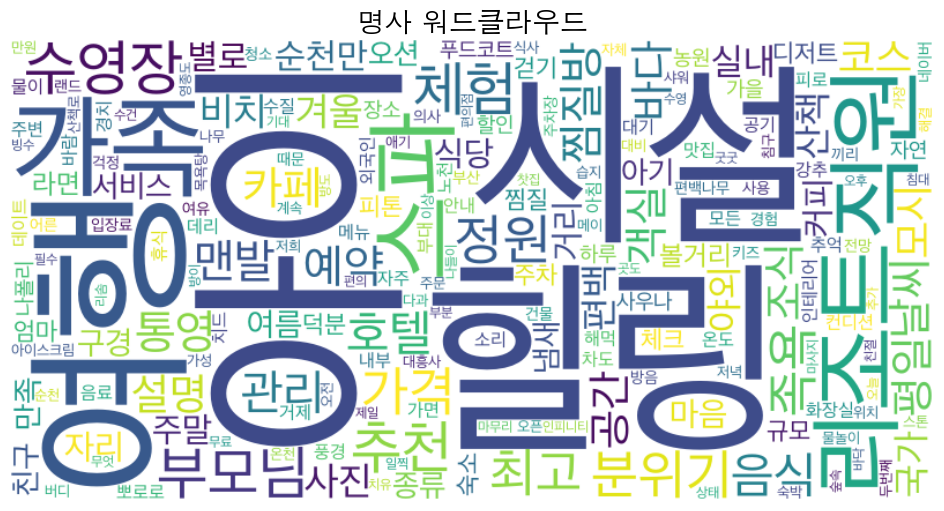

In [100]:
# 명사 워드 클라우드
import matplotlib.pyplot as plt
from matplotlib import rc

# Apple 기본 한글 폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지


wc = WordCloud(
    font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc',  # Mac용 한글 폰트 경로
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("명사 워드클라우드", fontsize=20)
plt.show()


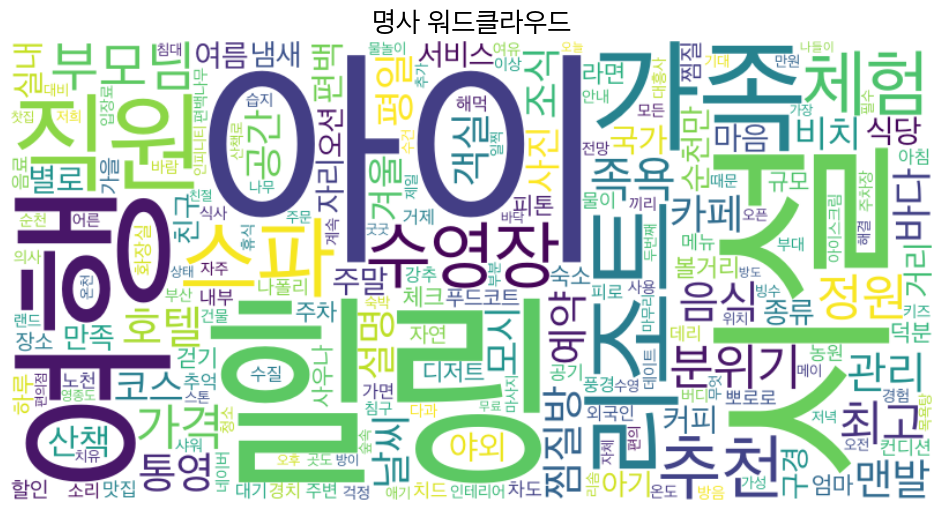

In [126]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 불용어 필터링
filtered_nouns = [word for word in all_nouns if word not in stopwords and len(word) > 1]

# 단어 빈도 계산
word_freq = Counter(filtered_nouns)

# 워드클라우드 생성용 딕셔너리: 필요한 경우 상위 n개만 자르기
# top_words_dict = dict(word_freq.most_common(100))  # ← 상위 100개만 시각화할 경우
top_words_dict = dict(word_freq)  # 전체 사용

# 폰트 경로 (Mac 기준 — Windows일 경우 바꿔야 함)
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'

# 워드클라우드 생성
wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(top_words_dict)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('명사 워드클라우드', fontsize=20)
plt.show()


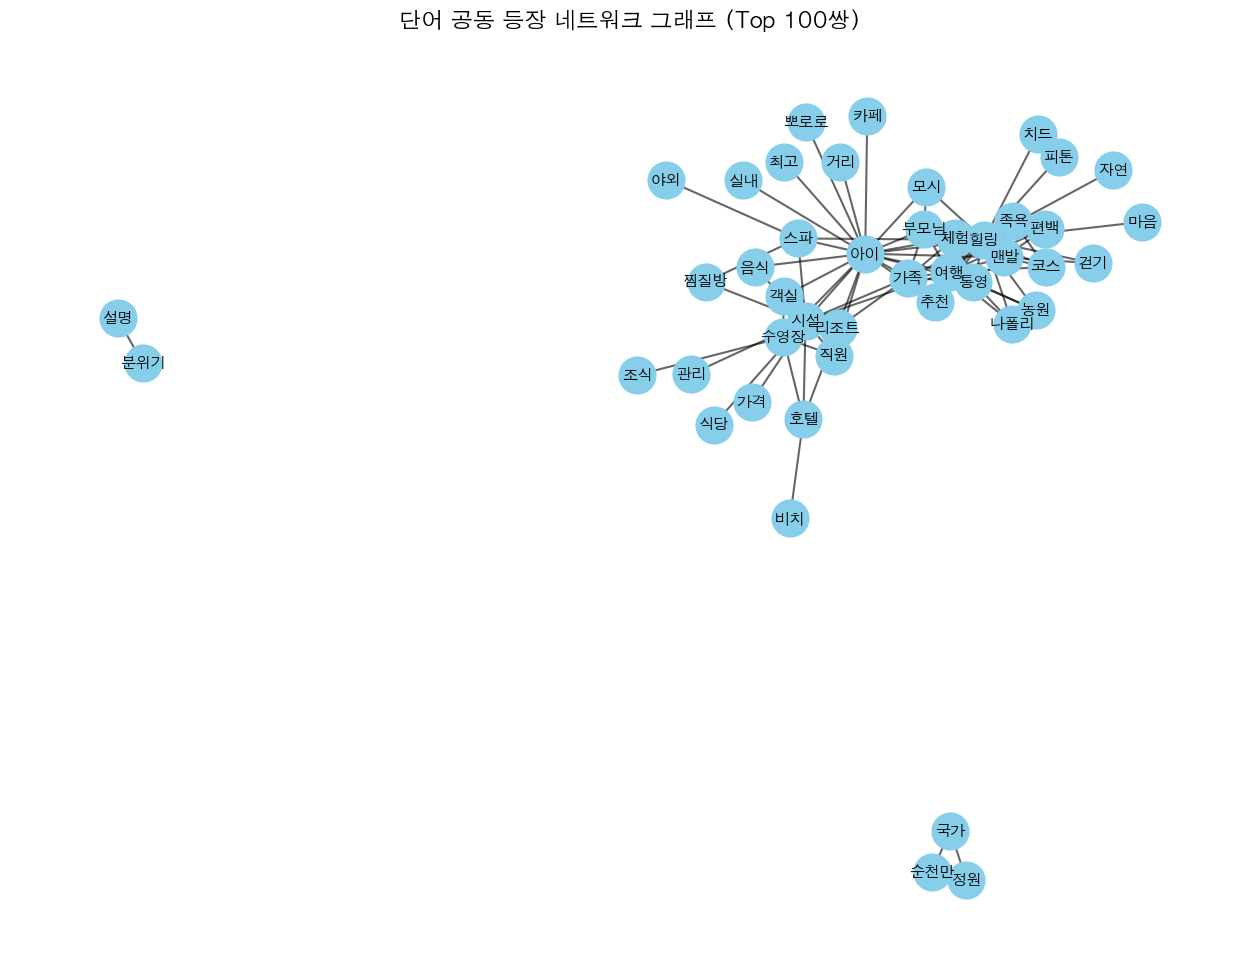

In [94]:
from itertools import combinations
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# ✅ 150번 이상 나온 키워드 중 불용어 제거
top_nouns = {'아이', '힐링', '시설', '여행', '가족', '직원', '리조트', '스파', '수영장', 
             '체험', '추천', '부모님', '정원', '분위기', '가격', '최고', '족욕', '음식', '호텔', 
             '관리', '통영', '찜질방', '맨발', '카페', '예약', '객실', '날씨', '바다', '평일', 
             '조식', '공간', '설명', '모시', '코스', '비치', '사진', '겨울', '산책', '편백', 
             '야외', '국가', '실내', '순천만', '식당', '주말', '별로', '자리', '거리', '커피',
             '마음', '입장', '구경', '여름', '서비스', '아기', '만족', '냄새', '종류', '친구',
             '오션', '볼거리', '라면', '디저트', '걷기', '규모', '피톤', '엄마', '주차', '바로',
             '찜질', '보고', '체크', '덕분', '숙소', '사우나', '하루', '푸드코트', '할인', '오기',
             '장소', '자연', '가을', '나폴리', '농원', '컨디션', '내부', '뽀로로', '노천', '메뉴',
             '추억', '공기', '맛집', '화장실', '차도', '치드'}

# 공동 등장 단어쌍 카운팅
pair_counter = Counter()

for noun_list in df['명사'].dropna():
    # 리스트에서 중복 제거 + top_nouns만 필터링
    filtered = list(set(noun_list) & top_nouns)
    for pair in combinations(filtered, 2):
        pair_counter.update([tuple(sorted(pair))])  # 순서 상관 없이 정렬

# 상위 100개 쌍만 사용
top_pairs = pair_counter.most_common(100)

# 네트워크 그래프 생성
G = nx.Graph()

for (w1, w2), count in top_pairs:
    G.add_edge(w1, w2, weight=count)

# 시각화
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(G, k=0.8)

nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_family='AppleGothic', font_size=11)

plt.title('단어 공동 등장 네트워크 그래프 (Top 100쌍)', fontsize=16)
plt.axis('off')
plt.show()


In [73]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
from sklearn.cluster import KMeans
import numpy as np


In [75]:
# '명사' 컬럼이 리스트 형태로 되어 있는 DataFrame 사용
co_occurrence = Counter()

for noun_list in df['명사'].dropna():
    noun_list = list(set(noun_list))  # 중복 제거
    pairs = combinations(noun_list, 2)
    co_occurrence.update(pairs)

# 상위 150개만 사용 (너무 많으면 복잡)
top_pairs = dict(co_occurrence.most_common(150))


In [77]:
G = nx.Graph()

# 노드 추가
for pair, weight in top_pairs.items():
    G.add_edge(pair[0], pair[1], weight=weight)

# 중심성 계산 (중간중심성, 연결중심성 등 중 택1)
centrality = nx.degree_centrality(G)


In [79]:
# 노드 이름 인덱스 부여
nodes = list(G.nodes())
node_idx = {node: i for i, node in enumerate(nodes)}

# 인접 행렬 생성
adj_matrix = nx.to_numpy_array(G, nodelist=nodes)

# KMeans 클러스터링 (그룹 수는 자유 조절)
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(adj_matrix)

# 노드별 클러스터 번호 저장
cluster_colors = {node: labels[i] for i, node in enumerate(nodes)}


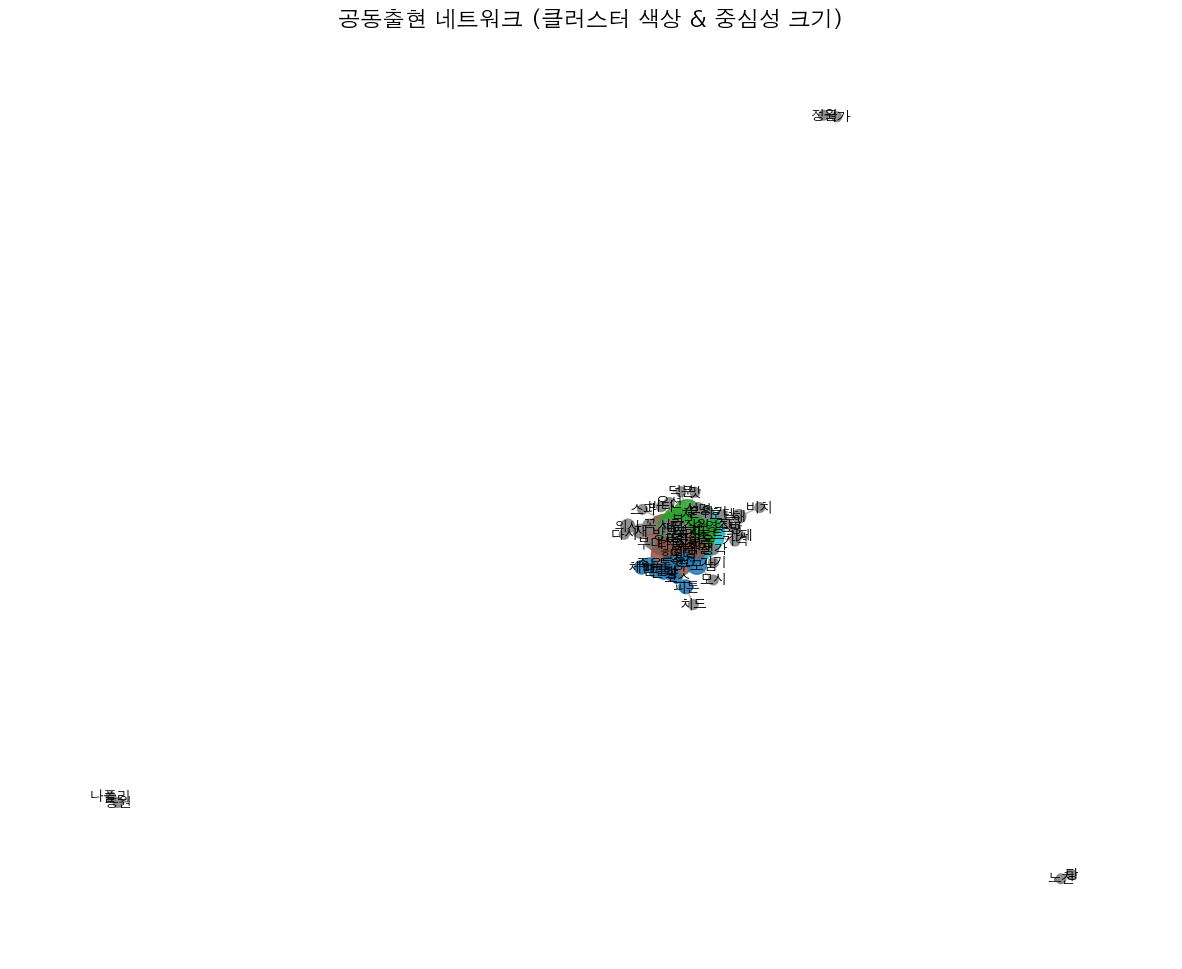

In [81]:
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G, seed=42)  # 레이아웃 고정

# 색상 지정 (클러스터 → 색)
colors = [cluster_colors[node] for node in G.nodes()]
sizes = [centrality[node] * 3000 for node in G.nodes()]  # 중심성 기반 크기

# 그래프 그리기
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=sizes, cmap='tab10', alpha=0.85)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_family='AppleGothic', font_size=10)

plt.title("공동출현 네트워크 (클러스터 색상 & 중심성 크기)", fontsize=16)
plt.axis('off')
plt.show()


In [83]:
from pyvis.network import Network
import networkx as nx
from collections import Counter

# 1. 네트워크 생성
net = Network(height="750px", width="100%", notebook=True, font_color="black", bgcolor="#ffffff")

# 2. 노드와 엣지 추가
G = nx.Graph()

# 상위 단어 필터링
top_words = [word for word, _ in Counter(all_nouns).most_common(100)]

# 공동출현 쌍 필터링
filtered_pairs = {pair: count for pair, count in top_pairs.items() if pair[0] in top_words and pair[1] in top_words}

# 노드 추가
for word in top_words:
    G.add_node(word)

# 엣지 추가
for (word1, word2), count in filtered_pairs.items():
    G.add_edge(word1, word2, weight=count)

# 중심성 계산해서 노드 크기 반영
centrality = nx.degree_centrality(G)

for node in G.nodes():
    net.add_node(node, 
                 size=centrality[node]*300 + 5,  # 중심성 기반 크기 조절
                 label=node)

# 엣지 추가
for edge in G.edges():
    net.add_edge(edge[0], edge[1])

# 3. 네트워크 그리기
net.show("network.html")


network.html


In [85]:
from pyvis.network import Network
import networkx as nx
from collections import Counter

# 1. 네트워크 생성
net = Network(height="750px", width="100%", notebook=True, font_color="black", bgcolor="#ffffff")

# 2. 노드와 엣지 추가
G = nx.Graph()

# 상위 단어 필터링
top_words = ['아이', '힐링', '시설', '여행', '가족', '직원', '리조트', '스파', '수영장', 
             '체험', '추천', '부모님', '정원', '분위기', '가격', '최고', '족욕', '음식', '호텔', 
             '관리', '통영', '찜질방', '맨발', '카페', '예약', '객실', '날씨', '바다', '평일', 
             '조식', '공간', '설명', '모시', '코스', '비치', '사진', '겨울', '산책', '편백', 
             '야외', '국가', '실내', '순천만', '식당', '주말', '별로', '자리', '거리', '커피',
             '마음', '입장', '구경', '여름', '서비스', '아기', '만족', '냄새', '종류', '친구',
             '오션', '볼거리', '라면', '디저트', '걷기', '규모', '피톤', '엄마', '주차', '바로',
             '찜질', '보고', '체크', '덕분', '숙소', '사우나', '하루', '푸드코트', '할인', '오기',
             '장소', '자연', '가을', '나폴리', '농원', '컨디션', '내부', '뽀로로', '노천', '메뉴',
             '추억', '공기', '맛집', '화장실', '차도', '치드']

# 공동출현 쌍 필터링
filtered_pairs = {pair: count for pair, count in top_pairs.items() if pair[0] in top_words and pair[1] in top_words}

# 노드 추가
for word in top_words:
    G.add_node(word)

# 엣지 추가
for (word1, word2), count in filtered_pairs.items():
    G.add_edge(word1, word2, weight=count)

# 중심성 계산해서 노드 크기 반영
centrality = nx.degree_centrality(G)

for node in G.nodes():
    net.add_node(node, 
                 size=centrality[node]*300 + 5,  # 중심성 기반 크기 조절
                 label=node)

# 엣지 추가
for edge in G.edges():
    net.add_edge(edge[0], edge[1])

# 3. 네트워크 그리기
net.show("network.html")

network.html


In [87]:
from pyvis.network import Network
import networkx as nx
from collections import Counter

# 단어 빈도수 예시 (실제 전체 all_nouns에서 계산한 거 사용해도 됨)
word_freq = Counter(all_nouns)  # ← 실제 all_nouns 리스트에서 만든 Counter 사용

# 네트워크 초기화
net = Network(height="750px", width="100%", notebook=True, font_color="black", bgcolor="#ffffff")

G = nx.Graph()

# 공동출현 쌍 필터링
filtered_pairs = {pair: count for pair, count in top_pairs.items() if pair[0] in top_words and pair[1] in top_words}

# 노드 추가 (빈도 기반 크기)
for word in top_words:
    freq = word_freq[word]
    size = freq * 0.05 + 5  # 🔹빈도 비례 크기 (스케일 조절 필요하면 계수 조정)
    net.add_node(word, size=size, label=word)
    G.add_node(word)

# 엣지 추가
for (word1, word2), count in filtered_pairs.items():
    G.add_edge(word1, word2)
    net.add_edge(word1, word2, value=count)

# 시각화
net.show("network_by_frequency.html")


network_by_frequency.html


In [89]:
from pyvis.network import Network
import networkx as nx
from collections import Counter

# 단어 빈도수 예시 (실제 전체 all_nouns에서 계산한 거 사용해도 됨)
word_freq = Counter(all_nouns)  # ← 실제 all_nouns 리스트에서 만든 Counter 사용

# 네트워크 초기화
net = Network(height="750px", width="100%", notebook=True, font_color="black", bgcolor="#ffffff")

G = nx.Graph()

# 2. 공동출현 빈도가 최소 2 이상인 것만 남긴다
filtered_pairs = {
    pair: count for pair, count in top_pairs.items()
    if pair[0] in top_words and pair[1] in top_words and count >= 2
}

# 노드 추가 (빈도 기반 크기)
for word in top_words:
    freq = word_freq[word]
    size = freq * 0.05 + 5  # 🔹빈도 비례 크기 (스케일 조절 필요하면 계수 조정)
    net.add_node(word, size=size, label=word)
    G.add_node(word)

# 엣지 추가
for (word1, word2), count in filtered_pairs.items():
    G.add_edge(word1, word2)
    net.add_edge(word1, word2, value=count)

# 시각화
net.show("network_by_frequency.html")


network_by_frequency.html


In [91]:
from pyvis.network import Network
import networkx as nx
from collections import Counter

# 단어 빈도수 예시 (실제 전체 all_nouns에서 계산한 거 사용해도 됨)
word_freq = Counter(all_nouns)  # ← 실제 all_nouns 리스트에서 만든 Counter 사용

# 네트워크 초기화
net = Network(height="750px", width="100%", notebook=True, font_color="black", bgcolor="#ffffff")

G = nx.Graph()

# 2. 공동출현 빈도가 최소 2 이상인 것만 남긴다
filtered_pairs = {
    pair: count for pair, count in top_pairs.items()
    if pair[0] in top_words and pair[1] in top_words and count >= 1
}

# 노드 추가 (빈도 기반 크기)
for word in top_words:
    freq = word_freq[word]
    size = freq * 0.05 + 5  # 🔹빈도 비례 크기 (스케일 조절 필요하면 계수 조정)
    net.add_node(word, size=size, label=word)
    G.add_node(word)

# 엣지 추가
for (word1, word2), count in filtered_pairs.items():
    G.add_edge(word1, word2)
    net.add_edge(word1, word2, value=count)

# 시각화
net.show("network_by_frequency.html")


network_by_frequency.html


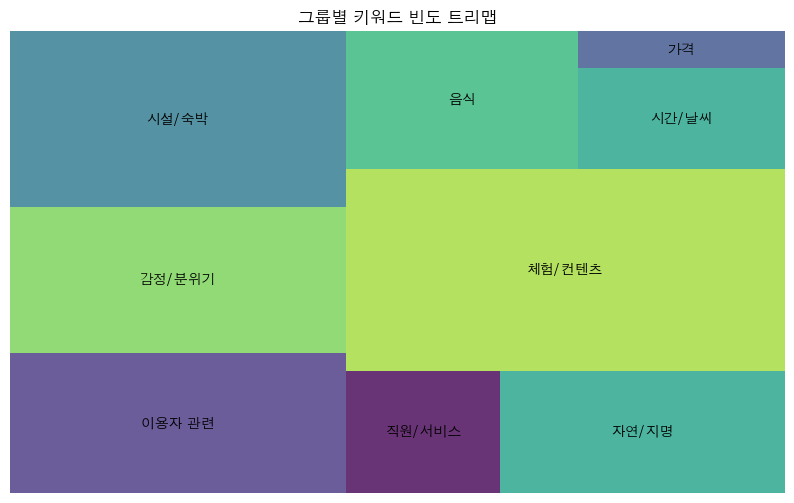

In [108]:
import squarify
import matplotlib.pyplot as plt

# 예시 데이터 (예린의 키워드 그룹별 빈도 합계)
labels = ["이용자 관련", "감정/분위기", "시설/숙박", "직원/서비스", "자연/지명", 
          "체험/컨텐츠", "음식", "시간/날씨", "가격"]
sizes = [4092, 4237, 5145, 1646, 3028, 7711, 2783, 1807, 664]

# 트리맵 생성
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.axis('off')
plt.title("그룹별 키워드 빈도 트리맵")
plt.show()


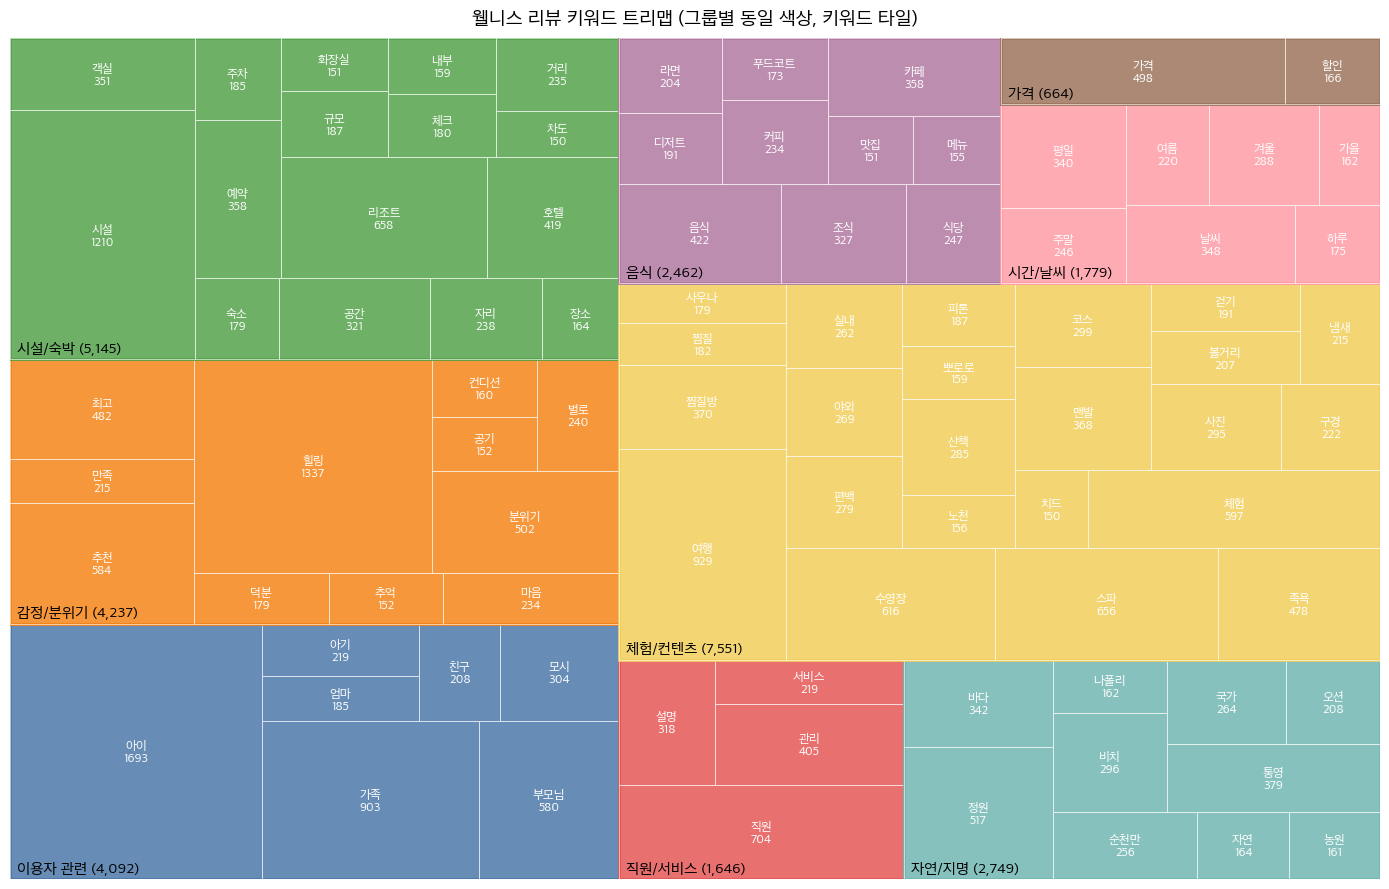

In [118]:
# -*- coding: utf-8 -*-
# 계층형(그룹→키워드) 트리맵: 그룹별 동일 색상, 키워드 네모가 실제 타일

import matplotlib.pyplot as plt
import squarify
import numpy as np

# 1) 한글 폰트 설정 (환경에 맞게 경로/이름 조정)
# - macOS: 'Apple SD Gothic Neo'
# - Windows: 'Malgun Gothic'
# - Linux: 'Noto Sans CJK KR' 권장
import matplotlib
matplotlib.rcParams['font.family'] = ['Apple SD Gothic Neo']
matplotlib.rcParams['axes.unicode_minus'] = False

# 2) 키워드 빈도 (네가 준 값)
keyword_counts = {
    "아이": 1693, "힐링": 1337, "시설": 1210, "여행": 929, "가족": 903,
    "직원": 704, "리조트": 658, "스파": 656, "수영장": 616, "체험": 597,
    "추천": 584, "부모님": 580, "정원": 517, "분위기": 502, "가격": 498,
    "최고": 482, "족욕": 478, "음식": 422, "호텔": 419, "관리": 405,
    "통영": 379, "찜질방": 370, "맨발": 368, "카페": 358, "예약": 358,
    "객실": 351, "날씨": 348, "바다": 342, "평일": 340, "조식": 327,
    "공간": 321, "설명": 318, "모시": 304, "코스": 299, "비치": 296,
    "사진": 295, "겨울": 288, "산책": 285, "편백": 279, "야외": 269,
    "국가": 264, "실내": 262, "순천만": 256, "식당": 247, "주말": 246,
    "별로": 240, "자리": 238, "거리": 235, "커피": 234, "마음": 234,
    "구경": 222, "여름": 220, "서비스": 219, "아기": 219,
    "만족": 215, "냄새": 215, "종류": 214, "친구": 208, "오션": 208,
    "볼거리": 207, "라면": 204, "디저트": 191, "걷기": 191, "규모": 187,
    "피톤": 187, "엄마": 185, "주차": 185, "찜질": 182, "체크": 180,
    "덕분": 179, "숙소": 179, "사우나": 179, "하루": 175, "푸드코트": 173,
    "할인": 166, "장소": 164, "자연": 164, "가을": 162, "나폴리": 162,
    "농원": 161, "컨디션": 160, "내부": 159, "뽀로로": 159, "노천": 156,
    "메뉴": 155, "추억": 152, "공기": 152, "맛집": 151, "화장실": 151,
    "차도": 150, "치드": 150
}

# 3) 그룹 정의 (중복/겹침 정리본)
groups = {
    "이용자 관련": ["아이", "가족", "부모님", "엄마", "아기", "친구", "모시"],
    "감정/분위기": ["추천", "만족", "최고", "덕분", "추억", "마음", "힐링", "분위기", "공기", "컨디션", "별로"],
    "시설/숙박": ["시설", "객실", "숙소", "공간", "자리", "장소", "예약", "주차", "리조트", "호텔", "규모", "화장실", "체크", "내부", "차도", "거리"],
    "직원/서비스": ["직원", "설명", "관리", "서비스"],
    "자연/지명": ["정원", "바다", "순천만", "자연", "농원", "비치", "나폴리", "통영", "국가", "오션"],  # 편백 제거, 순천만 중복 제거
    "체험/컨텐츠": ["여행", "찜질방", "찜질", "사우나", "수영장", "스파", "족욕", "편백", "야외", "실내", "노천", "산책", "뽀로로", "피톤", "치드", "체험", "맨발", "코스", "사진", "구경", "볼거리", "걷기", "냄새"],
    "음식": ["음식", "조식", "식당", "디저트", "라면", "커피", "푸드코트", "맛집", "메뉴", "카페"],
    "시간/날씨": ["주말", "평일", "날씨", "하루", "여름", "겨울", "가을"],
    "가격": ["가격", "할인"]
}

# 4) 그룹별 합계
group_sizes = {}
for g, kws in groups.items():
    group_sizes[g] = sum(keyword_counts.get(k, 0) for k in kws if k in keyword_counts)

# 5) 색상 팔레트 (그룹별 동일 색상)
# 필요 시 원하는 색으로 수정 가능
palette = [
    "#4C78A8", "#F58518", "#54A24B", "#E45756", "#72B7B2",
    "#F2CF5B", "#B279A2", "#FF9DA6", "#9D755D"
]
group_list = list(groups.keys())
group_color = {g: palette[i % len(palette)] for i, g in enumerate(group_list)}

# 6) 그룹 타일(큰 사각형) 배치
# 전체 캔버스 (0,0)~(1,1)
total_rect = [0, 0, 1, 1]
group_labels = group_list
group_values = [group_sizes[g] for g in group_list]

# squarify는 높이를 기준으로 normalize; 전체 높이=1, 너비=1이 되도록 normalization
norm_sizes = squarify.normalize_sizes(group_values, total_rect[2], total_rect[3])
group_rects = squarify.squarify(norm_sizes, total_rect[0], total_rect[1], total_rect[2], total_rect[3])

# 7) 그리기
fig, ax = plt.subplots(figsize=(14, 9))
ax.set_axis_off()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# 그룹 테두리 두께
group_border = 2.0
keyword_border = 0.5

# 8) 각 그룹 사각형 내부에 다시 키워드 트리맵
for g, grect in zip(group_list, group_rects):
    gx, gy, gw, gh = grect['x'], grect['y'], grect['dx'], grect['dy']
    # 그룹 배경(연한 색) – 시각적 영역 표시
    ax.add_patch(plt.Rectangle((gx, gy), gw, gh, linewidth=group_border,
                               edgecolor=group_color[g], facecolor='none'))

    # 그룹 내 키워드
    kws = [k for k in groups[g] if k in keyword_counts]
    vals = [keyword_counts[k] for k in kws]
    if not kws or sum(vals) == 0:
        continue

    # 그룹 영역 내 정규화 후 키워드 타일 생성
    norm_kw_sizes = squarify.normalize_sizes(vals, gw, gh)
    kw_rects = squarify.squarify(norm_kw_sizes, gx, gy, gw, gh)

    for k, r in zip(kws, kw_rects):
        x, y, w, h = r['x'], r['y'], r['dx'], r['dy']
        # 키워드 타일: 그룹 색(채우기), 흰 테두리 혹은 진한 테두리
        ax.add_patch(plt.Rectangle((x, y), w, h,
                                   linewidth=keyword_border,
                                   edgecolor="white",
                                   facecolor=group_color[g],
                                   alpha=0.85))

        # 라벨: 키워드 + 수치 (사각형이 너무 작으면 생략)
        label = f"{k}\n{keyword_counts[k]}"
        # 가독성을 위해 최소 크기 기준
        if w * h > 0.0025:
            ax.text(x + w*0.5, y + h*0.5, label,
                    va='center', ha='center', fontsize=9, color='white')

    ## ✅ 그룹명 라벨: 좌하단 & 검정색
    ax.text(
        gx + 0.005, gy + 0.005,                   # 좌하단 위치
        f"{g} ({group_sizes[g]:,})",              # 그룹명 + 빈도수
        va='bottom', ha='left',                   # 좌하단 정렬
        fontsize=11, color='black', fontweight='bold'  # 검정색, 볼드
    )


plt.title("웰니스 리뷰 키워드 트리맵 (그룹별 동일 색상, 키워드 타일)", pad=10, fontsize=14)
plt.tight_layout()
plt.show()


In [122]:
from pyvis.network import Network
import networkx as nx
from collections import Counter

# 단어 빈도수 예시 (실제 전체 all_nouns에서 계산한 거 사용해도 됨)
word_freq = Counter(all_nouns)

# 1. 그룹 정의 (예: 트리맵과 동일)
groups = {
    "이용자 관련": ["아이", "가족", "부모님", "엄마", "아기", "친구", "모시"],
    "감정/분위기": ["추천", "만족", "최고", "덕분", "추억", "마음", "힐링", "분위기", "공기", "컨디션", "별로"],
    "시설/숙박": ["시설", "객실", "숙소", "공간", "자리", "장소", "예약", "주차", "리조트", "호텔", "규모", "화장실", "체크", "내부", "차도", "거리"],
    "직원/서비스": ["직원", "설명", "관리", "서비스"],
    "자연/지명": ["정원", "바다", "순천만", "자연", "농원", "비치", "나폴리", "통영", "국가", "오션"],
    "체험/컨텐츠": ["여행", "찜질방", "찜질", "사우나", "수영장", "스파", "족욕", "편백", "야외", "실내", "노천", "산책", "뽀로로", "피톤", "치드", "체험", "맨발", "코스", "사진", "구경", "볼거리", "걷기", "냄새"],
    "음식": ["음식", "조식", "식당", "디저트", "라면", "커피", "푸드코트", "맛집", "메뉴", "카페"],
    "시간/날씨": ["주말", "평일", "날씨", "하루", "여름", "겨울", "가을"],
    "가격": ["가격", "할인"]
}

# 2. 그룹별 색상 지정
color_palette = [
    "#4C78A8", "#F58518", "#54A24B", "#E45756", "#72B7B2",
    "#F2CF5B", "#B279A2", "#FF9DA6", "#9D755D"
]
group_color = {group: color_palette[i % len(color_palette)] for i, group in enumerate(groups)}

# 3. 단어 → 그룹 매핑 (빠른 조회용)
word_to_group = {}
for group, words in groups.items():
    for word in words:
        word_to_group[word] = group

# 네트워크 초기화
net = Network(height="750px", width="100%", notebook=True, font_color="black", bgcolor="#ffffff")
G = nx.Graph()

# 공동출현 빈도 필터링
# top_pairs가 리스트인 경우: [(("단어1", "단어2"), count), ...]
filtered_pairs = {
    pair: count for pair, count in top_pairs
    if pair[0] in top_words and pair[1] in top_words and count >= 2
}


# 노드 추가 (빈도 기반 크기 + 그룹 색상)
for word in top_words:
    freq = word_freq[word]
    size = freq * 0.05 + 5  # 크기 조정
    group = word_to_group.get(word, "기타")
    color = group_color.get(group, "#CCCCCC")  # 기타는 회색
    net.add_node(word, size=size, label=word, color=color)
    G.add_node(word)

# 엣지 추가
for (word1, word2), count in filtered_pairs.items():
    G.add_edge(word1, word2)
    net.add_edge(word1, word2, value=count)

# 시각화
net.show("network_by_group_color.html")


network_by_group_color.html


In [132]:
from pyvis.network import Network
import networkx as nx
from collections import Counter

# 단어 빈도 계산
word_freq = Counter(all_nouns)

# 1. 그룹 정의
groups = {
    "이용자 관련": ["아이", "가족", "부모님", "엄마", "아기", "친구", "모시"],
    "감정/분위기": ["추천", "만족", "최고", "덕분", "추억", "마음", "힐링", "분위기", "공기", "컨디션", "별로"],
    "시설/숙박": ["시설", "객실", "숙소", "공간", "자리", "장소", "예약", "주차", "리조트", "호텔", "규모", "화장실", "체크", "내부", "차도", "거리"],
    "직원/서비스": ["직원", "설명", "관리", "서비스"],
    "자연/지명": ["정원", "바다", "순천만", "자연", "농원", "비치", "나폴리", "통영", "국가", "오션"],
    "체험/컨텐츠": ["여행", "찜질방", "찜질", "사우나", "수영장", "스파", "족욕", "편백", "야외", "실내", "노천", "산책", "뽀로로", "피톤", "치드", "체험", "맨발", "코스", "사진", "구경", "볼거리", "걷기", "냄새"],
    "음식": ["음식", "조식", "식당", "디저트", "라면", "커피", "푸드코트", "맛집", "메뉴", "카페"],
    "시간/날씨": ["주말", "평일", "날씨", "하루", "여름", "겨울", "가을"],
    "가격": ["가격", "할인"]
}

# 2. 그룹별 색상 지정
color_palette = [
    "#4C78A8", "#F58518", "#54A24B", "#E45756", "#72B7B2",
    "#F2CF5B", "#B279A2", "#FF9DA6", "#9D755D"
]
group_color = {group: color_palette[i % len(color_palette)] for i, group in enumerate(groups)}

# 3. 단어 → 그룹 매핑
word_to_group = {}
for group, words in groups.items():
    for word in words:
        word_to_group[word] = group

# 4. 네트워크 초기화
net = Network(height="750px", width="100%", notebook=True, font_color="black", bgcolor="#ffffff")
net.set_options("""
var options = {
  "nodes": {
    "font": {"size": 16}
  },
  "edges": {
    "color": {"inherit": true},
    "smooth": {"type": "dynamic"}
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -50,
      "centralGravity": 0.005,
      "springLength": 140,
      "springConstant": 0.02,
      "avoidOverlap": 1
    },
    "minVelocity": 0,
    "solver": "forceAtlas2Based"
  }
}
""")

G = nx.Graph()

# 5. 공동출현 필터링 (top_pairs가 리스트인 경우)
filtered_pairs = {
    pair: count for pair, count in top_pairs
    if pair[0] in top_words and pair[1] in top_words and count >= 2
}

# 6. 노드 추가
for word in top_words:
    freq = word_freq[word]
    size = freq * 0.05 + 5
    group = word_to_group.get(word, "기타")
    color = group_color.get(group, "#CCCCCC")  # 기타는 회색
    net.add_node(word, size=size, label=word, color=color)
    G.add_node(word)

# 7. 엣지 추가
for (w1, w2), cnt in filtered_pairs.items():
    G.add_edge(w1, w2)
    net.add_edge(w1, w2, value=cnt)

# 8. 결과 저장 및 시각화
net.show("network_by_group_color.html")


network_by_group_color.html


In [152]:
from pyvis.network import Network
import networkx as nx
from collections import Counter

# 단어 빈도 계산
word_freq = Counter(all_nouns)

# 1. 그룹 정의
groups = {
    "이용자 관련": ["아이", "가족", "부모님", "엄마", "아기", "친구", "모시"],
    "감정/분위기": ["추천", "만족", "최고", "덕분", "추억", "마음", "힐링", "분위기", "공기", "컨디션", "별로"],
    "시설/숙박": ["시설", "객실", "숙소", "공간", "자리", "장소", "예약", "주차", "리조트", "호텔", "규모", "화장실", "체크", "내부", "차도", "거리"],
    "직원/서비스": ["직원", "설명", "관리", "서비스"],
    "자연/지명": ["정원", "바다", "순천만", "자연", "농원", "비치", "나폴리", "통영", "국가", "오션"],
    "체험/컨텐츠": ["여행", "찜질방", "찜질", "사우나", "수영장", "스파", "족욕", "편백", "야외", "실내", "노천", "산책", "뽀로로", "피톤", "치드", "체험", "맨발", "코스", "사진", "구경", "볼거리", "걷기", "냄새"],
    "음식": ["음식", "조식", "식당", "디저트", "라면", "커피", "푸드코트", "맛집", "메뉴", "카페"],
    "시간/날씨": ["주말", "평일", "날씨", "하루", "여름", "겨울", "가을"],
    "가격": ["가격", "할인"]
}

# 2. 그룹별 색상 지정
color_palette = [
    "#4C78A8", "#F58518", "#54A24B", "#E45756", "#72B7B2",
    "#F2CF5B", "#B279A2", "#FF9DA6", "#9D755D"
]
group_color = {group: color_palette[i % len(color_palette)] for i, group in enumerate(groups)}

# 3. 단어 → 그룹 매핑
word_to_group = {}
for group, words in groups.items():
    for word in words:
        word_to_group[word] = group

# 4. 네트워크 초기화
net = Network(height="750px", width="100%", notebook=True, font_color="black", bgcolor="#ffffff")
net.set_options("""
var options = {
  "nodes": {
    "font": {"size": 50}
  },
  "edges": {
    "color": {"inherit": true},
    "smooth": {"type": "dynamic"}
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -50,
      "centralGravity": 0.001,
      "springLength": 40,
      "springConstant": 0.02,
      "avoidOverlap": 1
    },
    "minVelocity": 0,
    "solver": "forceAtlas2Based"
  }
}
""")

G = nx.Graph()

# 5. 공동출현 필터링 (top_pairs가 리스트인 경우)
filtered_pairs = {
    pair: count for pair, count in top_pairs
    if pair[0] in top_words and pair[1] in top_words and count >= 2
}

# 6. 노드 추가
for word in top_words:
    freq = word_freq[word]
    size = freq * 0.05 + 5
    group = word_to_group.get(word, "기타")
    color = group_color.get(group, "#CCCCCC")  # 기타는 회색
    net.add_node(word, size=size, label=word, color=color)
    G.add_node(word)

# 7. 엣지 추가
for (w1, w2), cnt in filtered_pairs.items():
    G.add_edge(w1, w2)
    net.add_edge(w1, w2, value=cnt)

# 8. 결과 저장 및 시각화
net.show("network_by_group_color.html")


network_by_group_color.html


In [154]:
from pyvis.network import Network
import networkx as nx
from collections import Counter

# 단어 빈도 계산
word_freq = Counter(all_nouns)

# 1. 그룹 정의
groups = {
    "이용자 관련": ["아이", "가족", "부모님", "엄마", "아기", "친구", "모시"],
    "감정/분위기": ["추천", "만족", "최고", "덕분", "추억", "마음", "힐링", "분위기", "공기", "컨디션", "별로"],
    "시설/숙박": ["시설", "객실", "숙소", "공간", "자리", "장소", "예약", "주차", "리조트", "호텔", "규모", "화장실", "체크", "내부", "차도", "거리"],
    "직원/서비스": ["직원", "설명", "관리", "서비스"],
    "자연/지명": ["정원", "바다", "순천만", "자연", "농원", "비치", "나폴리", "통영", "국가", "오션"],
    "체험/컨텐츠": ["여행", "찜질방", "찜질", "사우나", "수영장", "스파", "족욕", "편백", "야외", "실내", "노천", "산책", "뽀로로", "피톤", "치드", "체험", "맨발", "코스", "사진", "구경", "볼거리", "걷기", "냄새"],
    "음식": ["음식", "조식", "식당", "디저트", "라면", "커피", "푸드코트", "맛집", "메뉴", "카페"],
    "시간/날씨": ["주말", "평일", "날씨", "하루", "여름", "겨울", "가을"],
    "가격": ["가격", "할인"]
}

# 2. 그룹별 색상 지정
color_palette = [
    "#4C78A8", "#F58518", "#54A24B", "#E45756", "#72B7B2",
    "#F2CF5B", "#B279A2", "#FF9DA6", "#9D755D"
]
group_color = {group: color_palette[i % len(color_palette)] for i, group in enumerate(groups)}

# 3. 단어 → 그룹 매핑
word_to_group = {}
for group, words in groups.items():
    for word in words:
        word_to_group[word] = group

# 4. 네트워크 초기화
net = Network(height="750px", width="100%", notebook=True, font_color="black", bgcolor="#ffffff")
net.set_options("""
var options = {
  "nodes": {
    "font": {"size": 50}
  },
  "edges": {
    "color": {"inherit": true},
    "smooth": {"type": "dynamic"}
  },
  "physics": {
    "forceAtlas2Based": {
      "gravitationalConstant": -50,
      "centralGravity": 0.001,
      "springLength": 40,
      "springConstant": 0.02,
      "avoidOverlap": 1
    },
    "minVelocity": 0,
    "solver": "forceAtlas2Based"
  }
}
""")

G = nx.Graph()

# 5. 공동출현 필터링 (top_pairs가 리스트인 경우)
filtered_pairs = {
    pair: count for pair, count in top_pairs
    if pair[0] in top_words and pair[1] in top_words and count >= 5
}

# 6. 노드 추가
for word in top_words:
    freq = word_freq[word]
    size = freq * 0.05 + 5
    group = word_to_group.get(word, "기타")
    color = group_color.get(group, "#CCCCCC")  # 기타는 회색
    net.add_node(word, size=size, label=word, color=color)
    G.add_node(word)

# 7. 엣지 추가
for (w1, w2), cnt in filtered_pairs.items():
    G.add_edge(w1, w2)
    net.add_edge(w1, w2, value=cnt)

# 8. 결과 저장 및 시각화
net.show("network_by_group_color.html")


network_by_group_color.html
